# Predicting categories with Naive Bayes & SVMS

**Aim**: The aim of this notebook is to provide code-based examples for the implementation of the Naive Bayes & Linear Support Vector Machines using scikit-learn. 

## Table of contents 

1. Naive Bayes Classifier
2. Linear Support Vector Machines

## Package Requirements 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Naive Bayes Classifier

In [2]:
df = pd.read_csv('fraud_prediction.csv')

df = df.drop(['Unnamed: 0'], axis = 1)

#Creating the features 

features = df.drop('isFraud', axis = 1).values
target = df['isFraud'].values

**Splitting the data into training & test sets**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, 
                                                    stratify = target)

**Building the Naive Bayes Clssifier**

In [4]:
#Initializing an NB classifier

nb_classifier = GaussianNB()

In [5]:
#Fitting the classifier into the training data

nb_classifier.fit(X_train, y_train)

GaussianNB()

In [6]:
#Extracting the accuracy score from the base classifier

nb_classifier.score(X_test, y_test)

0.8841091883987326

## Linear Support Vector Machines

In [7]:
df = pd.read_csv('fraud_prediction.csv')

df = df.drop(['Unnamed: 0'], axis = 1)

#Creating the features 

features = df.drop('isFraud', axis = 1).values
target = df['isFraud'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, 
                                                    stratify = target)

**Building the linear SVM**

In [9]:
#Initializing a SVM model 

svm = LinearSVC(random_state = 42)

In [10]:
#Fitting the model to the training data

svm.fit(X_train, y_train)

/Users/raultoscanomiranda/opt/anaconda3/envs/mi_virtual_env_3_8/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [11]:
#Extracting the accuracy score from the training data

svm.score(X_test, y_test)

0.9629539361442847

**Graphical hyper-parameter optimization**

/Users/raultoscanomiranda/opt/anaconda3/envs/mi_virtual_env_3_8/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/raultoscanomiranda/opt/anaconda3/envs/mi_virtual_env_3_8/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/raultoscanomiranda/opt/anaconda3/envs/mi_virtual_env_3_8/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/raultoscanomiranda/opt/anaconda3/envs/mi_virtual_env_3_8/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/raultoscanomiranda/opt/anaconda3/envs/mi_virtual_env_3_8/lib/python3.8/site-packages/sklearn/svm/_base.py:120

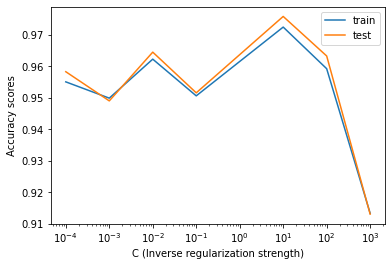

In [12]:
training_scores = []
testing_scores = []

param_list = [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000]

# Evaluate the training and test classification errors for each value of the parameter

for param in param_list:
    
    # Create SVM object and fit
    
    svm = LinearSVC(C = param, random_state = 42)
    svm.fit(X_train, y_train)
    
    # Evaluate the accuracy scores and append to lists
    
    training_scores.append(svm.score(X_train, y_train) )
    testing_scores.append(svm.score(X_test, y_test) )
    
# Plot results

plt.semilogx(param_list, training_scores, param_list, testing_scores)
plt.legend(("train", "test"))
plt.ylabel('Accuracy scores')
plt.xlabel('C (Inverse regularization strength)')
plt.show()

**Hyper-parameter optimization using GridSearchCV**

In [29]:
#Building the model 

svm = LinearSVC(random_state = 50)

#Using GridSearchCV to search for the best parameter

grid = GridSearchCV(svm, {'C':[0.00001, 0.0001, 0.001, 0.01, 0.1, 10]})
grid.fit(X_train, y_train)

# Print out the best parameter

print("The best value of the inverse regularization strength is:", grid.best_params_)

The best value of the inverse regularization strength is: {'C': 0.1}


**Scaling the data**

In [32]:
#Setting up the scaling pipeline 

order = [('scaler', StandardScaler()), ('SVM', LinearSVC(C = 0.1, random_state = 50))]

pipeline = Pipeline(order)

#Fitting the classfier to the scaled dataset 

svm_scaled = pipeline.fit(X_train, y_train)

#Extracting the score 

svm_scaled.score(X_test, y_test)

0.99717779868297274